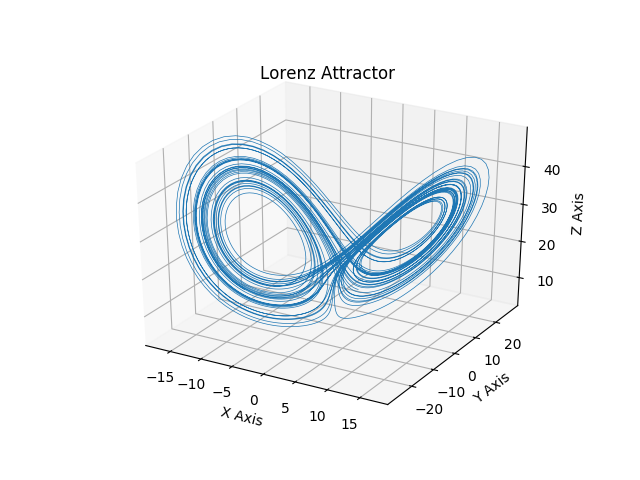

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=5, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

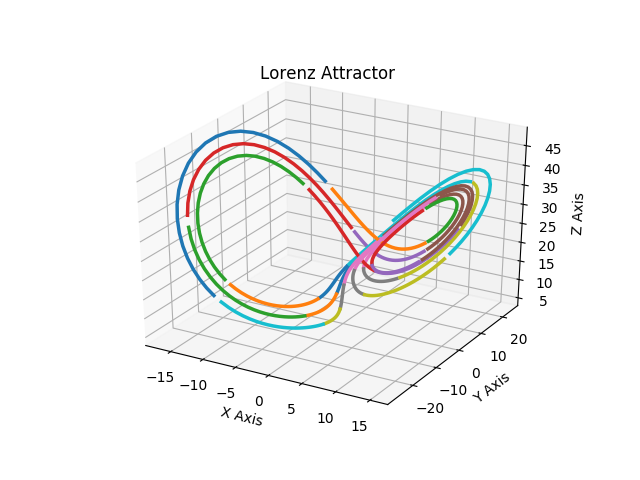

In [5]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[7500:10000]
xyz_coords = xyz_coords[7500:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,30):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T, lw=2.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [6]:
t2s = Traj2Sim()
t2s.set_trajectories(traj_list[:-2])
t2s.dist = 'mssd'

t2s.compute_mssd(verbose=False)

|███████████████████████████████████████▏⚠︎ (!) 4656/4753 [98%] in 4:30.1 (119.3/s, ▄▂▂ 22/4753 [0%] in 1s (19.7/s,  90/4753 [2%] in 4s (20.3/s, 94/4753 [2%] in 5s (20.4/s,  ▅▇▇ 108/4753 [2%] in 5s (20.5/s, 114/4753 [2%] in 6s (20.5/s,201/4753 [4%] in 10s (20.9/s ▄▆█ 214/4753 [5%] in 10s (20.6/s ▇▇▅ 221/4753 [5%] in 11s (20.4/s 245/4753 [5%] in 12s (20.0/s258/4753 [5%] in 13s (20.0/s260/4753 [5%] in 13s (19.9/s 288/4753 [6%] in 15s (19.5/s in 15s (19.4/s295/4753 [6%] in 15s (19.3/s (19.0/s ▄▂▂ 348/4753 [7%] in 18s (19.0/s(18.8/s ▃▅▇ 431/4753 [9%] in 23s (18.6/s (18.5/sin 24s (18.5/s(18.5/(18.5/in 27s (18.4/ ▂▄▆ 555/4753 [12%] in 30s (18.2/569/4753 [12%] in 31s (18.2/ ▁▃▅ 586/4753 [12%] in 32s (18.2/▆█▆ 598/4753 [13%] in 33s (18.2/ ▅▇▇ 626/4753 [13%] in 35s (18.0/▁▃▅ 640/4753 [13%] in 36s (18.0/661/4753 [14%] in 37s (17.9/ ▆▄▂ 690/4753 [15%] in 39s (17.8/ 693/4753 [15%] in 39s (17.8/696/4753 [15%] in 39s (17.8/in 42s (17.7/ ▃▁▃ 788/4753 [17%] in 45s (17.7/ 839/4753 [18%] in 48s (17.6/ 8

4
[[14.20800018 14.62899971]
 [11.13700008 11.76599979]]


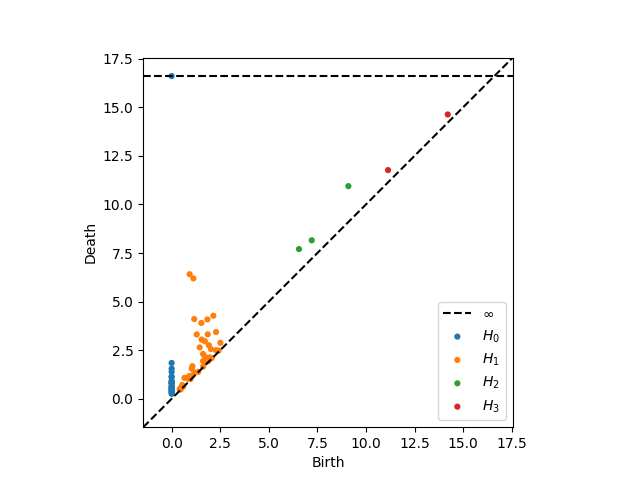

In [22]:
%load_ext autoreload

%autoreload 2

from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
np.save('dist_lorenz', t2s.dist_mat)
dgms = ripser(t2s.dist_mat, distance_matrix=True, maxdim=3)['dgms']
print(len(dgms))
print(dgms[3])
plt.clf()
plot_diagrams(dgms, show = True)

Persistence intervals:
[(0, (0.0, inf)), (1, (0.928, 6.41)), (1, (1.119, 6.194)), (1, (1.161, 4.103)), (1, (1.529, 3.9)), (1, (1.841, 4.082)), (1, (2.147, 4.271)), (0, (0.0, 2.035)), (1, (1.29, 3.309)), (2, (9.094, 10.941))]
3617033


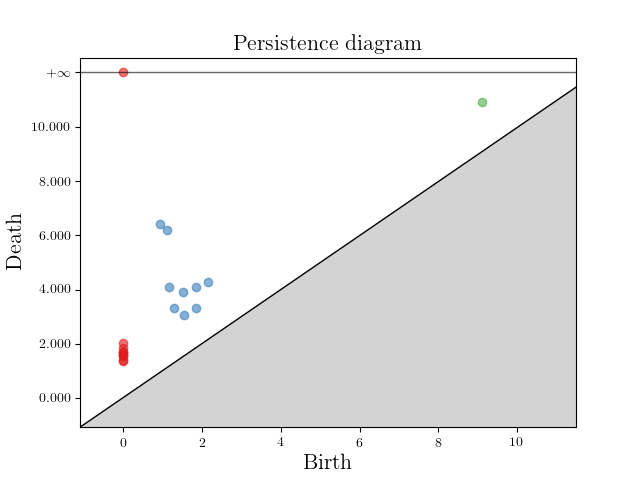

In [16]:
t2s.compute_sim(verbose=False)
print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])
print(t2s.simplex_tree.num_simplices())

gudhi.plot_persistence_diagram(pers[:20])

Persistence intervals:
[(0, (0.0, inf)), (1, (1.927, 14.871)), (1, (2.751, 14.969)), (1, (2.478, 6.211)), (1, (3.018, 6.435)), (0, (0.0, 3.139)), (1, (2.798, 5.636)), (0, (0.0, 2.814)), (0, (0.0, 2.786)), (1, (2.956, 5.656))]


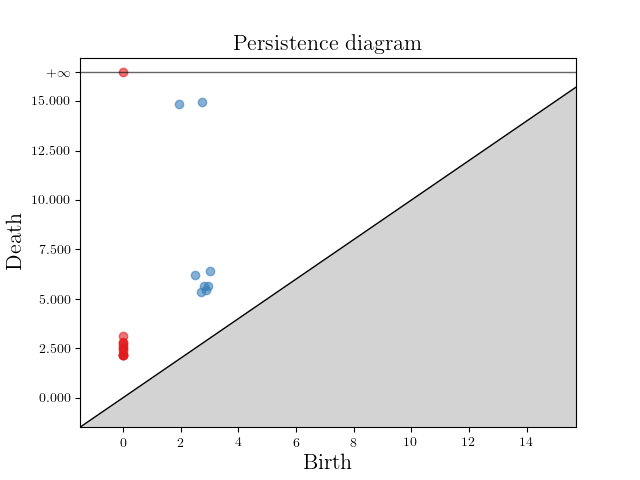

In [10]:
verbose=False
'''
for i in range(len(t2s.trajectories)):
    for j in range(i+1, len(t2s.trajectories)):
        #self.MSSD[i][j-i-1].set_trajectories(self.trajectories[i], self.trajectories[j])
        #t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].inf_metric()
        t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].t_thresh_metric(t_thresh=15)
        t2s.dist_mat[j,i] = t2s.dist_mat[i,j]
        if verbose == True:
            print('Custom distance between ' + str(i) + ', ' + str(j) + ': ' + str(t2s.dist_mat[i,j]))
'''

t2s.update_mssd(met='t_thresh', t_thresh=15)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])

In [ ]:
t2s_n = Traj2Sim()
t2s_n.set_trajectories(traj_list)
t2s_n.dist = 'mssd'

t2s_n.compute_mssd(verbose=True)
t2s_n.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s_n.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])
